# Задание

Распознавание рукописного ввода на примере базы MNIST

Построить классификатор изображений рукописного ввода на базе MNIST. В качестве шаблона в данной работе можно использовать ipython-ноутбук 002-digit.ipynb.

Классификатор предлагается строить на признаках, полученных в результате предобработки изображений, например, гистограммы градиентов (HOG) или результат PCA преобразования.

В качестве модели классификатора можно использовать любую известную Вам модель, за исключением сверточных нейронных сетей.

Критерием качества классификатора является метрика accuracy. Для получения зачета по данной работе, значение метрики accuracy должно быть больше 0.6. Метрика оценивается на тестовой выборке в рамках контеста Digit Recognizer на Kaggle.

Решение необходимо предоставить в виде ipython-ноутбука с реализацией процесса построения модели и скриншота с финальным результатом на Kaggle.

# Библиотеки

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import os
import os.path

# Загрузка данных

In [47]:
train_data = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test_data = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [48]:
train_img = np.resize(train_data[:, 1:], (train_data.shape[0], 28, 28))
test_img = np.resize(test_data,(test_data.shape[0], 28, 28))
train_label = train_data[:, 0]

In [49]:
train_img.shape

(42000, 28, 28)

# Визуализируем исходные данные

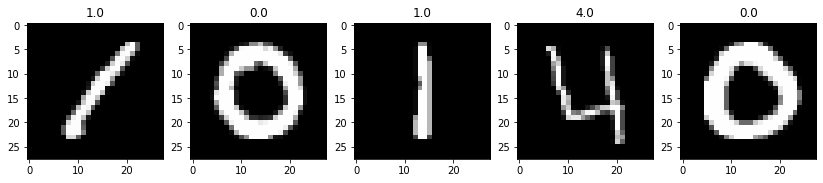

In [50]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

# Сокращение количества признаков с использованием PCA

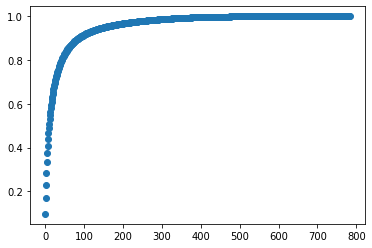

In [52]:
Y = train_label
X = train_img.reshape(-1, 28 * 28).astype(np.float32)
X_test_img = test_img.reshape(-1, 28 * 28).astype(np.float32)
X_mean = X.mean(axis=0)
X -= X_mean
cov = np.dot(X.T, X) / X.shape[0]
U, S, _ = np.linalg.svd(cov)
S_cumsum = np.cumsum(S) / np.sum(S)
plt.plot(S_cumsum, 'o')
try:
    os.makedirs(f'./images/PCA')
except:
    pass
filename = f'./images/PCA/S.png'
plt.savefig(filename)

In [63]:
lim = 0.95
n_comp = np.argmax(np.where(S_cumsum > lim, 1, 0))
print('n_comp=%d S=%.3f' % (n_comp, S_cumsum[n_comp]))

n_comp=153 S=0.950


In [64]:
Xtrain_lim = np.dot(X, U[:, :n_comp])
Xtest_lim = np.dot(X_test_img, U[:, :n_comp])

# Создание модели на основе RandomForestClassifier

In [65]:
x_train, x_val , y_train, y_val= train_test_split(Xtrain_lim, Y, test_size=0.2,
    random_state=42)

In [66]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
y_pred = clf.predict(x_val)

In [68]:
print('Accuracy: %s' % accuracy_score(y_val, y_pred))

Accuracy: 0.9427380952380953


In [69]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       816
         1.0       0.98      0.98      0.98       909
         2.0       0.95      0.93      0.94       846
         3.0       0.92      0.92      0.92       937
         4.0       0.93      0.95      0.94       839
         5.0       0.92      0.93      0.93       702
         6.0       0.96      0.98      0.97       785
         7.0       0.95      0.94      0.94       893
         8.0       0.93      0.89      0.91       835
         9.0       0.92      0.92      0.92       838

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



In [70]:
print(confusion_matrix(y_val, y_pred))

[[795   0   2   1   2   4   7   0   4   1]
 [  0 894   5   1   1   3   2   0   2   1]
 [  3   5 788  10  10   1   4   5  18   2]
 [  5   1  12 862   1  15   2  12  18   9]
 [  2   1   1   2 798   0   7   6   2  20]
 [  1   0   2  15   6 656  11   2   6   3]
 [  7   1   2   0   2   5 768   0   0   0]
 [  1   8   9   2  12   2   0 836   3  20]
 [  5   5   5  29   8  22   1   3 747  10]
 [  1   1   3  20  17   3   2  13   3 775]]


# Предсказания на тестовых данных

In [74]:
clf = RandomForestClassifier()
clf.fit(Xtrain_lim, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
pred_test = clf.predict(Xtest_lim)

# Визуализируем предсказания

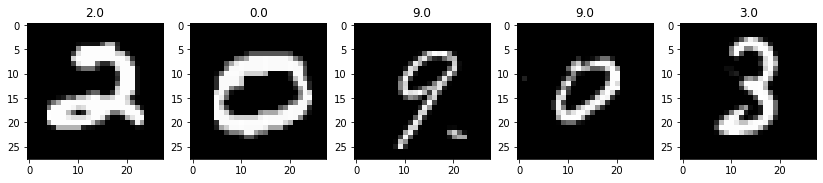

In [77]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

# Файл для отправки

In [79]:
try:
    os.makedirs(f'./result/')
except:
    pass
with open('./result/submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [80]:
!head submit.txt

head: submit.txt: No such file or directory


In [81]:
# Your submission scored 0.81